In [1]:
from network_v2 import *
from utils import *
import mnist
import matplotlib.pyplot as plt
from tqdm import tqdm
from train import *

In [2]:
images = mnist.train_images()   # берем изображение цифры (label='5')
train_labels = mnist.train_labels()

image = images[0,:,:]
label = train_labels[0]

print(label)

5


In [3]:
time = 1000
dt = 1

## STDP

$\Delta W = A_+ e^{(t_{pre} - t_{post}) / \tau_+}$, if $t_{post} > t_{pre}$

$\Delta W = A_- e^{(t_{pre} - t_{post}) / \tau_-}$, if $t_{post} < t_{pre}$

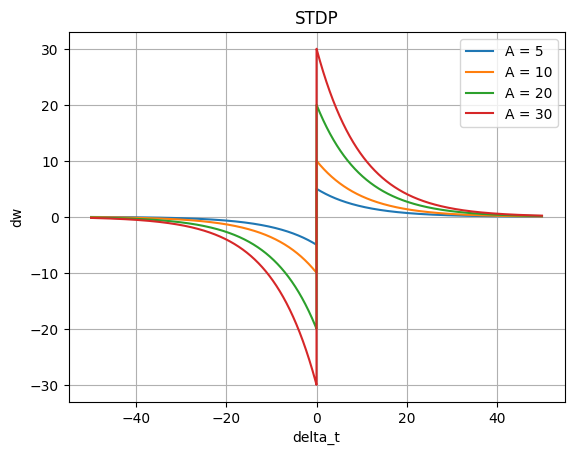

In [4]:
delta_t = np.linspace(-50, 50, 10000)
dw_1 = []

for t in delta_t:
    dw_1.append(stdp(t))

dw_2 = []
for t in delta_t:
    dw_2.append(stdp(t, a_plus=20, a_minus = 20))

dw_3 = []
for t in delta_t:
    dw_3.append(stdp(t, a_plus=30, a_minus = 30))

dw_4 = []
for t in delta_t:
    dw_4.append(stdp(t, a_plus=5, a_minus = 5))

dw_1 = np.array(dw_1)
dw_2 = np.array(dw_2)
dw_3 = np.array(dw_3)
dw_4 = np.array(dw_4)

plt.plot(delta_t, dw_4, label='A = 5')
plt.plot(delta_t, dw_1, label='A = 10')
plt.plot(delta_t, dw_2, label='A = 20')
plt.plot(delta_t, dw_3, label='A = 30')
plt.xlabel('delta_t')
plt.ylabel('dw')
plt.title('STDP')
plt.grid()
plt.legend()

In [5]:
# def delta_times_calc(lst_1: list, lst_2: list) -> list:
#     delta_times = []
#     for i in range(len(lst_1)):
#         for j in range(len(lst_2)):
#             delta_times.append(lst_1[i] - lst_2[j])

#     return delta_times



# def update_synapse(spike_times_1, spike_times_2, synapse):
#     for i in range(len(spike_times_1)):
#         if spike_times_1[i] == []:
#             continue
        
#         for j in range(len(spike_times_2)):
#             if spike_times_2[j] == []:
#                 continue
            
#             delta_times = delta_times_calc(spike_times_1[i], spike_times_2[j])

#             dw = sum(list(map(stdp, delta_times)))
#             synapse[j, i] = synapse[j, i] + dw

#     return synapse

In [6]:
time = 100
dt = 1

data = image_to_spike(image=image, num_steps=time)

In [7]:
epochs = 30

input_size = 784
hidden_size = 1000
output_size = 10

model = SpikingNetwork(input_size, hidden_size, output_size, dt)

for epoch in tqdm(range(epochs)):
    print(f'Epoch #{epoch}')
    print('Feedforward...')

    output, membrane_net = model.feedforward(data)
    output_l3 = output[2]

    print('Results:')
    for i in range(len(output_l3)):
        print(f'Label {i} --- {output_l3[i].tolist().count(1)}')

    print('Training...')

    synapse_1 = update_synapse(model.spike_times[0], model.spike_times[1], synapse=model.synapse1)
    model.synapse1 = synapse_1
    print('Synapse 1 done!')

    synapse_2 = update_synapse(model.spike_times[1], model.spike_times[2], synapse=model.synapse2)
    model.synapse2 = synapse_2
    print('Synapse 2 done!')

    sum_synapse = np.sum(model.synapse1) + np.sum(model.synapse2)
    print(f'Synapse sum = {sum_synapse}({sum_synapse/model.sum_synapse})')

    print('-' * 20)

    model.spike_times = []  # Важно сбросить!

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch #0
Feedforward...
Results:
Label 0 --- 6
Label 1 --- 6
Label 2 --- 6
Label 3 --- 6
Label 4 --- 6
Label 5 --- 6
Label 6 --- 6
Label 7 --- 6
Label 8 --- 6
Label 9 --- 6
Training...
Synapse 1 done!


  3%|▎         | 1/30 [00:33<16:08, 33.41s/it]

Synapse 2 done!
Synapse sum = -325154.2285865222(-0.2730373970359153)
--------------------
Epoch #1
Feedforward...
Results:
Label 0 --- 26
Label 1 --- 26
Label 2 --- 26
Label 3 --- 26
Label 4 --- 26
Label 5 --- 26
Label 6 --- 26
Label 7 --- 26
Label 8 --- 26
Label 9 --- 26
Training...
Synapse 1 done!


  7%|▋         | 2/30 [01:31<22:27, 48.11s/it]

Synapse 2 done!
Synapse sum = -3710524.7413282073(-3.115789148471835)
--------------------
Epoch #2
Feedforward...
Results:
Label 0 --- 31
Label 1 --- 31
Label 2 --- 31
Label 3 --- 31
Label 4 --- 31
Label 5 --- 31
Label 6 --- 31
Label 7 --- 31
Label 8 --- 31
Label 9 --- 31
Training...


  7%|▋         | 2/30 [02:06<29:24, 63.03s/it]


KeyboardInterrupt: 

In [ ]:
membrane_net[2][0]

array([ 4.63763176e+02, -6.50000000e+01,  2.00911759e+01,  7.68834517e+02,
       -6.50000000e+01, -9.14086158e+01,  5.06013795e+02, -6.50000000e+01,
       -4.48921796e+01, -4.56979650e+02,  2.04594319e+04, -6.50000000e+01,
       -9.79363669e+01,  1.45841337e+04, -6.50000000e+01, -1.79492472e+02,
        7.16927111e+03, -6.50000000e+01,  1.31202897e+01,  2.10439370e+02,
       -6.50000000e+01,  7.36572320e+03, -6.50000000e+01, -1.07422285e+02,
        1.43261954e+04, -6.50000000e+01, -9.20016846e+01,  1.42922674e+04,
       -6.50000000e+01, -1.47655471e+02,  1.45511937e+04, -6.50000000e+01,
       -1.27421887e+02, -9.70480865e+02,  4.73761544e+04, -6.50000000e+01,
       -1.08005599e+03,  5.57209312e+04, -6.50000000e+01, -9.00590866e+02,
        2.71910593e+04, -6.50000000e+01, -8.91678101e+02,  2.66135944e+04,
       -6.50000000e+01, -7.38242373e+01,  1.46215781e+04, -6.50000000e+01,
       -6.37575707e+01, -2.30955656e+02,  1.55943981e+04, -6.50000000e+01,
       -7.51133820e+02,  